# Univariate Regression

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

df = pd.read_csv('data.csv')
df.head()

,x,y
0,0.033554,-0.769511
1,1.408211,1.660056
2,1.263543,3.523426
3,-0.184194,-0.812238
4,-0.100872,1.904836


In [5]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,test_size = 0.2, random_state = 123)


In [7]:
X_train = df_train[['x']]  # double brackt indicates that i need to put values of x column in list[]
Y_train = df_train[['y']]

X_test = df_test[['x']]
Y_test = df_test[['y']]

After we have splitted our data , we will create our model now

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # this will evaluate performance of our model

# creating the model

Lin_model = LinearRegression()
Lin_model.fit(X_train,Y_train)

LinearRegression()

In [10]:
# coefficients and intercept of our model

a = Lin_model.coef_[0]
b = Lin_model.intercept_

print('the equation for the best linear fit is:\n Y= ',a, '+' ,b, 'X')

the equation for the best linear fit is:
 Y=  [1.22813302] + [-0.08381608] X


<function matplotlib.pyplot.show(close=None, block=None)>

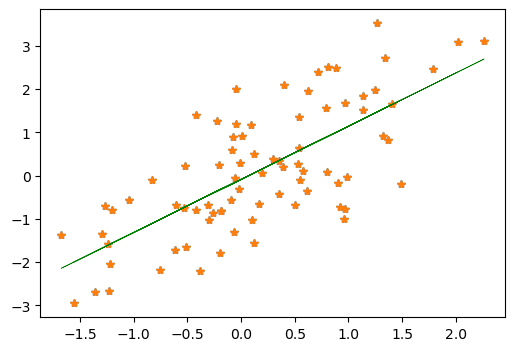

In [17]:
Y_train_pred = Lin_model.predict(X_train)

plt.figure(figsize =(6,4))
plt.plot(X_train, Y_train, '*')
plt.plot(X_train, Y_train, '*')
plt.plot(X_train, Y_train_pred, '-g',linewidth = '0.5')
plt.show

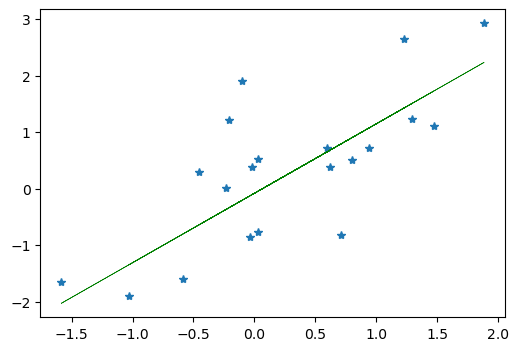

In [18]:
Y_test_pred = Lin_model.predict(X_test)

plt.figure(figsize=(6,4))
plt.plot(X_test,Y_test, '*')
plt.plot(X_test,Y_test_pred,'-g',linewidth = '0.5')
plt.show()

In [22]:
# Predict on the training set
Y_train_pred = Lin_model.predict(X_train)

# Predict on the test set
Y_test_pred = Lin_model.predict(X_test)

# Calculate the MSE for training predictions
mse_train = mean_squared_error(Y_train,Y_train_pred)
print(f"Training Mean Squared Error;{mse_train}")

# Calculate the MSE for the test predictions
mse_test = mean_squared_error(Y_test,Y_test_pred)
print(f"Test Mean Squared Error:{mse_test}")

Training Mean Squared Error;1.0487918565255954
Test Mean Squared Error:0.8010710709601654


In [23]:
X_train.shape

(80, 1)

# Setting a small training set

In [25]:
def get_mse(target_train_size):
    N = len(df)
    target_test_perc = (N-target_train_size)/N

    df_train,df_test = train_test_split(df,test_size = target_test_perc, random_state = 123)

    X_train = df_train[['x']]
    Y_train = df_train['y']

    X_test = df_test[['x']]
    Y_test = df_test['y']

    Lin_model_s = LinearRegression().fit(X_train,Y_train)
    Y_train_pred = Lin_model.predict(X_train)
    Y_test_pred = Lin_model.predict(X_test)

    mse_train = mean_squared_error(Y_train,Y_train_pred)
    mse_test = mean_squared_error(Y_test,Y_test_pred)

    return mse_train,mse_test

In [27]:
mse_train, mse_test = get_mse(target_train_size = 15)
print(f"Training Mean Squared Error: {mse_train}")
print(f"Test Mean Squared Error: {mse_test}")

Training Mean Squared Error: 0.7716847282559814
Test Mean Squared Error: 1.0394058707930733


# Multivariate regression

In [30]:
df = pd.read_csv('3.2_data.csv')
df.sample(5)

,x1,x2,x3,x4,x5,y
152,-18.408897,3.324065,11.012673,-1.158113,6.834001,-43.686348
263,-16.021449,-10.518980,-18.824451,5.349892,8.203421,-4.850757
218,-5.335139,0.609240,10.413667,-8.628298,3.284625,-57.975311
382,1.066797,-5.303601,-12.187212,3.255860,-16.230285,-2.050396
497,14.371998,-7.839528,15.535431,-5.817454,6.715782,-42.807262


In [31]:
df_train, df_test = train_test_split(df,test_size=0.2, random_state = 123)

In [32]:
X_train = df_train[['x1', 'x2', 'x3', 'x4', 'x5']]
Y_train = df_train['y']

X_test = df_test[['x1', 'x2', 'x3', 'x4', 'x5']]
Y_test = df_test['y']

In [ ]:
multi_model = LinearRegression().fit(X_train, Y_train)

coefficients = multi_model.coef_
intercept = multi_model.intercept_
